Datset is imbalanced
"Type, TWF,HDF,PWF,PSF,RNF should be one hot encoding
Comments missing

In [359]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [315]:
data = pd.read_csv("ai4i2020.csv")

In [316]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [317]:
data.shape

(10000, 14)

In [318]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [320]:
data["Type"].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [321]:
#doing one hot encoding for Type variable. Converting Type column to 3 separate variables 
#called Type_L, Type_M and Type_H. There are 3 types of categorical levels in Type.
#Therefore converting the Type column to 3 separate variables
oneHotEncodingType = pd.get_dummies(data['Type'],prefix='Type')
data = pd.concat([data,oneHotEncodingType],axis=1)
data.drop('Type',axis=1,inplace=True)

In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
 8   TWF                      10000 non-null  int64  
 9   HDF                      10000 non-null  int64  
 10  PWF                      10000 non-null  int64  
 11  OSF                      10000 non-null  int64  
 12  RNF                      10000 non-null  int64  
 13  Type_H                   10000 non-null  uint8  
 14  Type_L                 

In [323]:
data['TWF'].value_counts()

0    9954
1      46
Name: TWF, dtype: int64

In [324]:
#performing one hot encoding for TWF since it is a categorical variable
oneHotEncodingTWF = pd.get_dummies(data['TWF'],prefix='TWF')
data = pd.concat([data,oneHotEncodingTWF],axis=1)
data.drop('TWF',axis=1,inplace=True)

In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
 12  Type_H                   10000 non-null  uint8  
 13  Type_L                   10000 non-null  uint8  
 14  Type_M                 

In [326]:
data['HDF'].value_counts()

0    9885
1     115
Name: HDF, dtype: int64

In [327]:
#performing one hot encoding for HDF
oneHotEncodingHDF = pd.get_dummies(data['HDF'],prefix='HDF')
data = pd.concat([data,oneHotEncodingHDF],axis=1)
data.drop('HDF',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
 8   PWF                      10000 non-null  int64  
 9   OSF                      10000 non-null  int64  
 10  RNF                      10000 non-null  int64  
 11  Type_H                   10000 non-null  uint8  
 12  Type_L                   10000 non-null  uint8  
 13  Type_M                   10000 non-null  uint8  
 14  TWF_0                  

In [328]:
data['PWF'].value_counts()

0    9905
1      95
Name: PWF, dtype: int64

In [329]:
#performing one-hot encoding for PWF since it is a categorical variable
oneHotEncodingPWF = pd.get_dummies(data['PWF'],prefix='PWF')
data = pd.concat([data,oneHotEncodingPWF],axis=1)
data.drop('PWF',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
 8   OSF                      10000 non-null  int64  
 9   RNF                      10000 non-null  int64  
 10  Type_H                   10000 non-null  uint8  
 11  Type_L                   10000 non-null  uint8  
 12  Type_M                   10000 non-null  uint8  
 13  TWF_0                    10000 non-null  uint8  
 14  TWF_1                  

In [330]:
data['OSF'].value_counts()

0    9902
1      98
Name: OSF, dtype: int64

In [331]:
#performing one-hot encoding for OSF since it is a categorical variable
oneHotEncodingOSF = pd.get_dummies(data['OSF'],prefix='OSF')
data = pd.concat([data,oneHotEncodingOSF],axis=1)
data.drop('OSF',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
 8   RNF                      10000 non-null  int64  
 9   Type_H                   10000 non-null  uint8  
 10  Type_L                   10000 non-null  uint8  
 11  Type_M                   10000 non-null  uint8  
 12  TWF_0                    10000 non-null  uint8  
 13  TWF_1                    10000 non-null  uint8  
 14  HDF_0                  

In [332]:
data['RNF'].value_counts()

0    9981
1      19
Name: RNF, dtype: int64

In [333]:
#performing one-hot encoding for RNF since it is a categorical variable
oneHotEncodingRNF = pd.get_dummies(data['RNF'],prefix='RNF')
data = pd.concat([data,oneHotEncodingRNF],axis=1)
data.drop('RNF',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
 8   Type_H                   10000 non-null  uint8  
 9   Type_L                   10000 non-null  uint8  
 10  Type_M                   10000 non-null  uint8  
 11  TWF_0                    10000 non-null  uint8  
 12  TWF_1                    10000 non-null  uint8  
 13  HDF_0                    10000 non-null  uint8  
 14  HDF_1                  

In [334]:
data["Machine failure"].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [335]:
data.drop("Product ID",axis=1,inplace=True)

In [341]:
data.shape


(10000, 20)

In [342]:
target = data['Machine failure']
inputFeatures = data.drop('Machine failure',axis=1)

In [343]:
scaler= StandardScaler()
standardizedInput = scaler.fit_transform(inputFeatures)

In [344]:
inputData = pd.DataFrame(standardizedInput,columns=inputFeatures.columns)

In [345]:
inputData.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,TWF_0,TWF_1,HDF_0,HDF_1,PWF_0,PWF_1,OSF_0,OSF_1,RNF_0,RNF_1
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-9.094947e-17,-9.322321e-16,-1.693934e-15,-2.330580e-16,5.424994e-16,1.051603e-16,-4.263256e-17,4.760636e-17,-9.592327e-17,7.354117e-16,-4.973799e-18,-3.836931e-16,1.136868e-17,-4.561684e-16,2.415845e-17,3.389289e-16,-6.750156e-18,2.870593e-16,-1.705303e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.731878e+00,-2.352278e+00,-2.901986e+00,-2.068196e+00,-3.630149e+00,-1.695984e+00,-3.338886e-01,-1.224745e+00,-6.541861e-01,-1.471024e+01,-6.797983e-02,-9.271274e+00,-1.078600e-01,-1.021093e+01,-9.793424e-02,-1.005191e+01,-9.948362e-02,-2.291977e+01,-4.363046e-02
25%,-8.659388e-01,-8.523974e-01,-8.125581e-01,-6.458012e-01,-6.808401e-01,-8.633176e-01,-3.338886e-01,-1.224745e+00,-6.541861e-01,6.797983e-02,-6.797983e-02,1.078600e-01,-1.078600e-01,9.793424e-02,-9.793424e-02,9.948362e-02,-9.948362e-02,4.363046e-02,-4.363046e-02
50%,0.000000e+00,4.753123e-02,6.365340e-02,-1.995597e-01,1.134481e-02,7.698234e-04,-3.338886e-01,8.164966e-01,-6.541861e-01,6.797983e-02,-6.797983e-02,1.078600e-01,-1.078600e-01,9.793424e-02,-9.793424e-02,9.948362e-02,-9.948362e-02,4.363046e-02,-4.363046e-02
75%,8.659388e-01,7.474757e-01,7.376623e-01,4.084443e-01,6.834663e-01,8.491466e-01,-3.338886e-01,8.164966e-01,1.528617e+00,6.797983e-02,-6.797983e-02,1.078600e-01,-1.078600e-01,9.793424e-02,-9.793424e-02,9.948362e-02,-9.948362e-02,4.363046e-02,-4.363046e-02
max,1.731878e+00,2.247357e+00,2.557486e+00,7.514840e+00,3.672902e+00,2.278819e+00,2.995011e+00,8.164966e-01,1.528617e+00,6.797983e-02,1.471024e+01,1.078600e-01,9.271274e+00,9.793424e-02,1.021093e+01,9.948362e-02,1.005191e+01,4.363046e-02,2.291977e+01


In [346]:
inputData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  float64
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  float64
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  float64
 6   Type_H                   10000 non-null  float64
 7   Type_L                   10000 non-null  float64
 8   Type_M                   10000 non-null  float64
 9   TWF_0                    10000 non-null  float64
 10  TWF_1                    10000 non-null  float64
 11  HDF_0                    10000 non-null  float64
 12  HDF_1                    10000 non-null  float64
 13  PWF_0                    10000 non-null  float64
 14  PWF_1                  

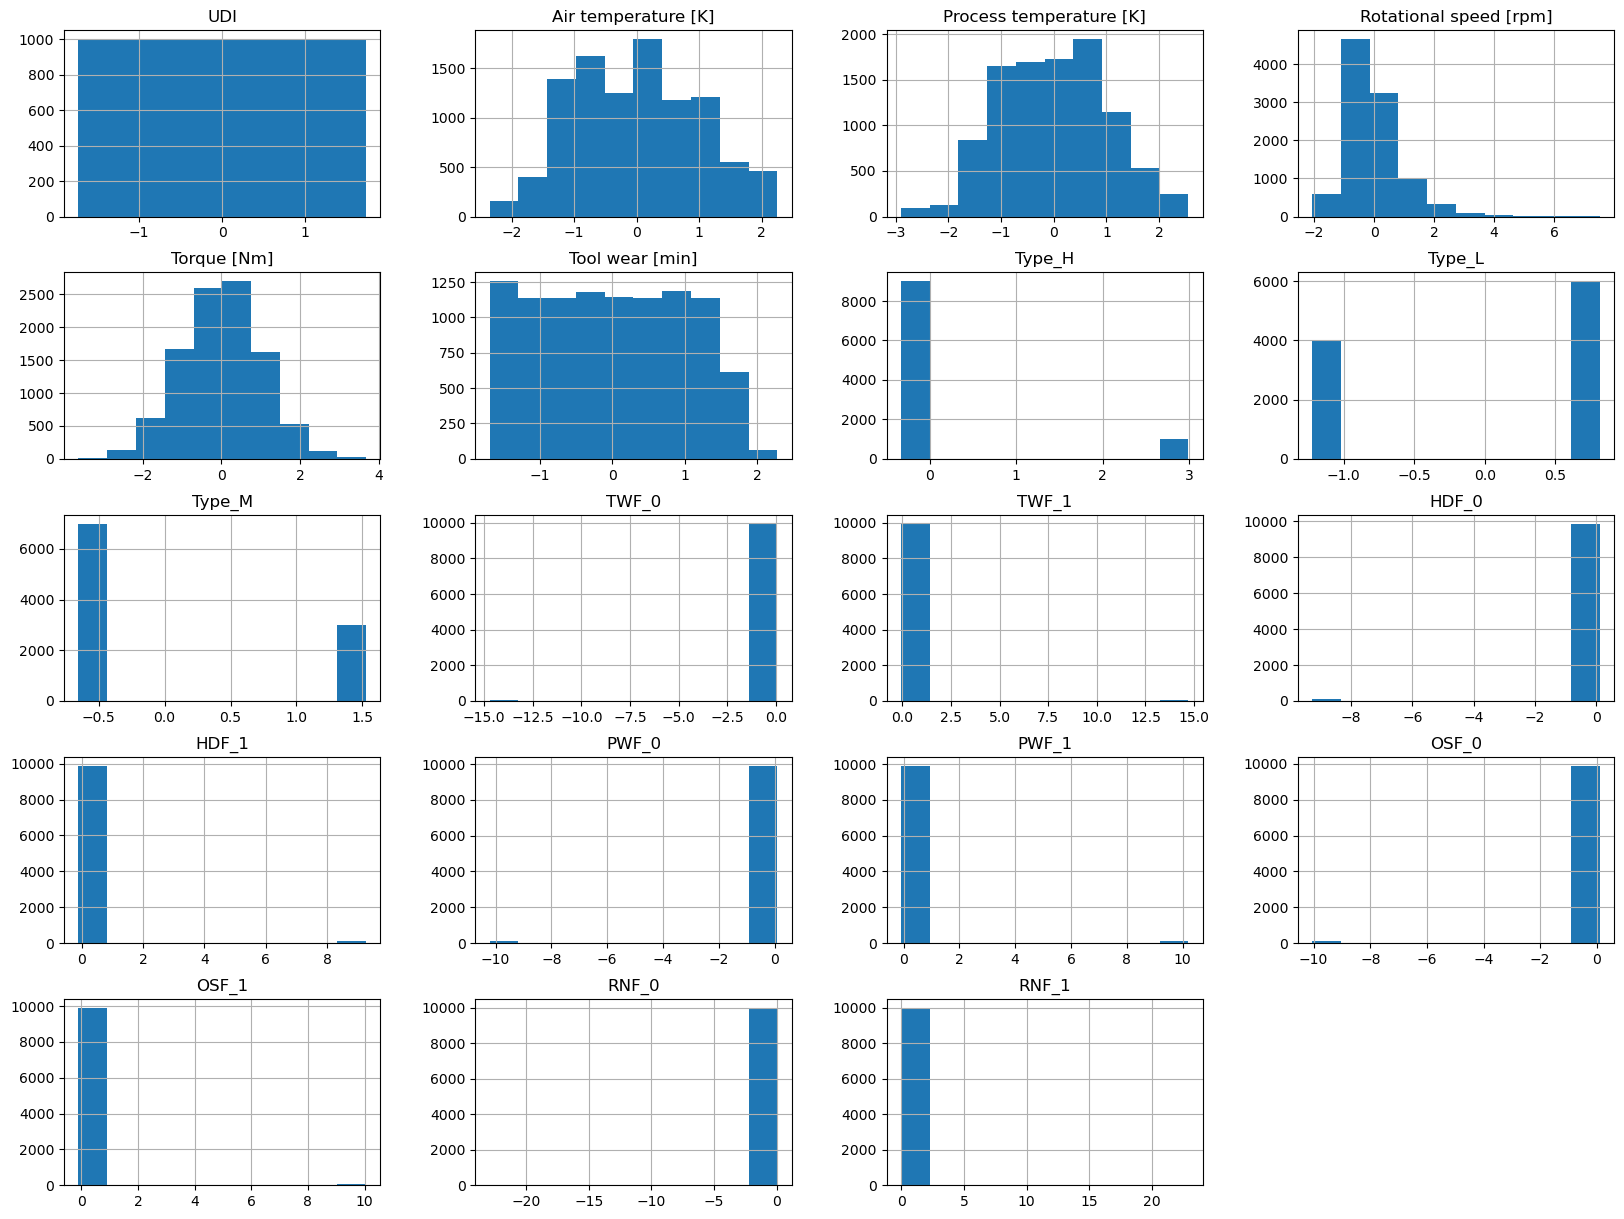

In [347]:
inputData.hist(bins=10, figsize=(20,15))
plt.show()

In [349]:
target.value_counts()


0    9661
1     339
Name: Machine failure, dtype: int64

<AxesSubplot: >

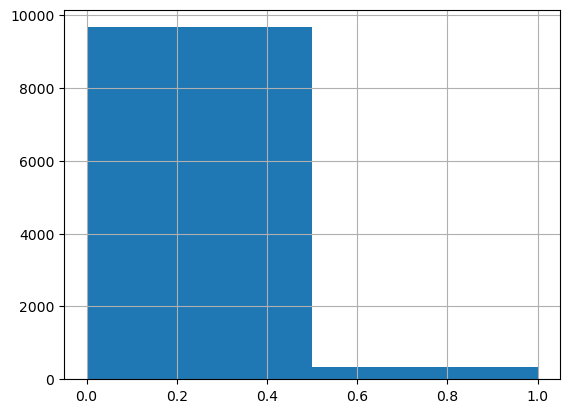

In [350]:
target.hist(bins=2)

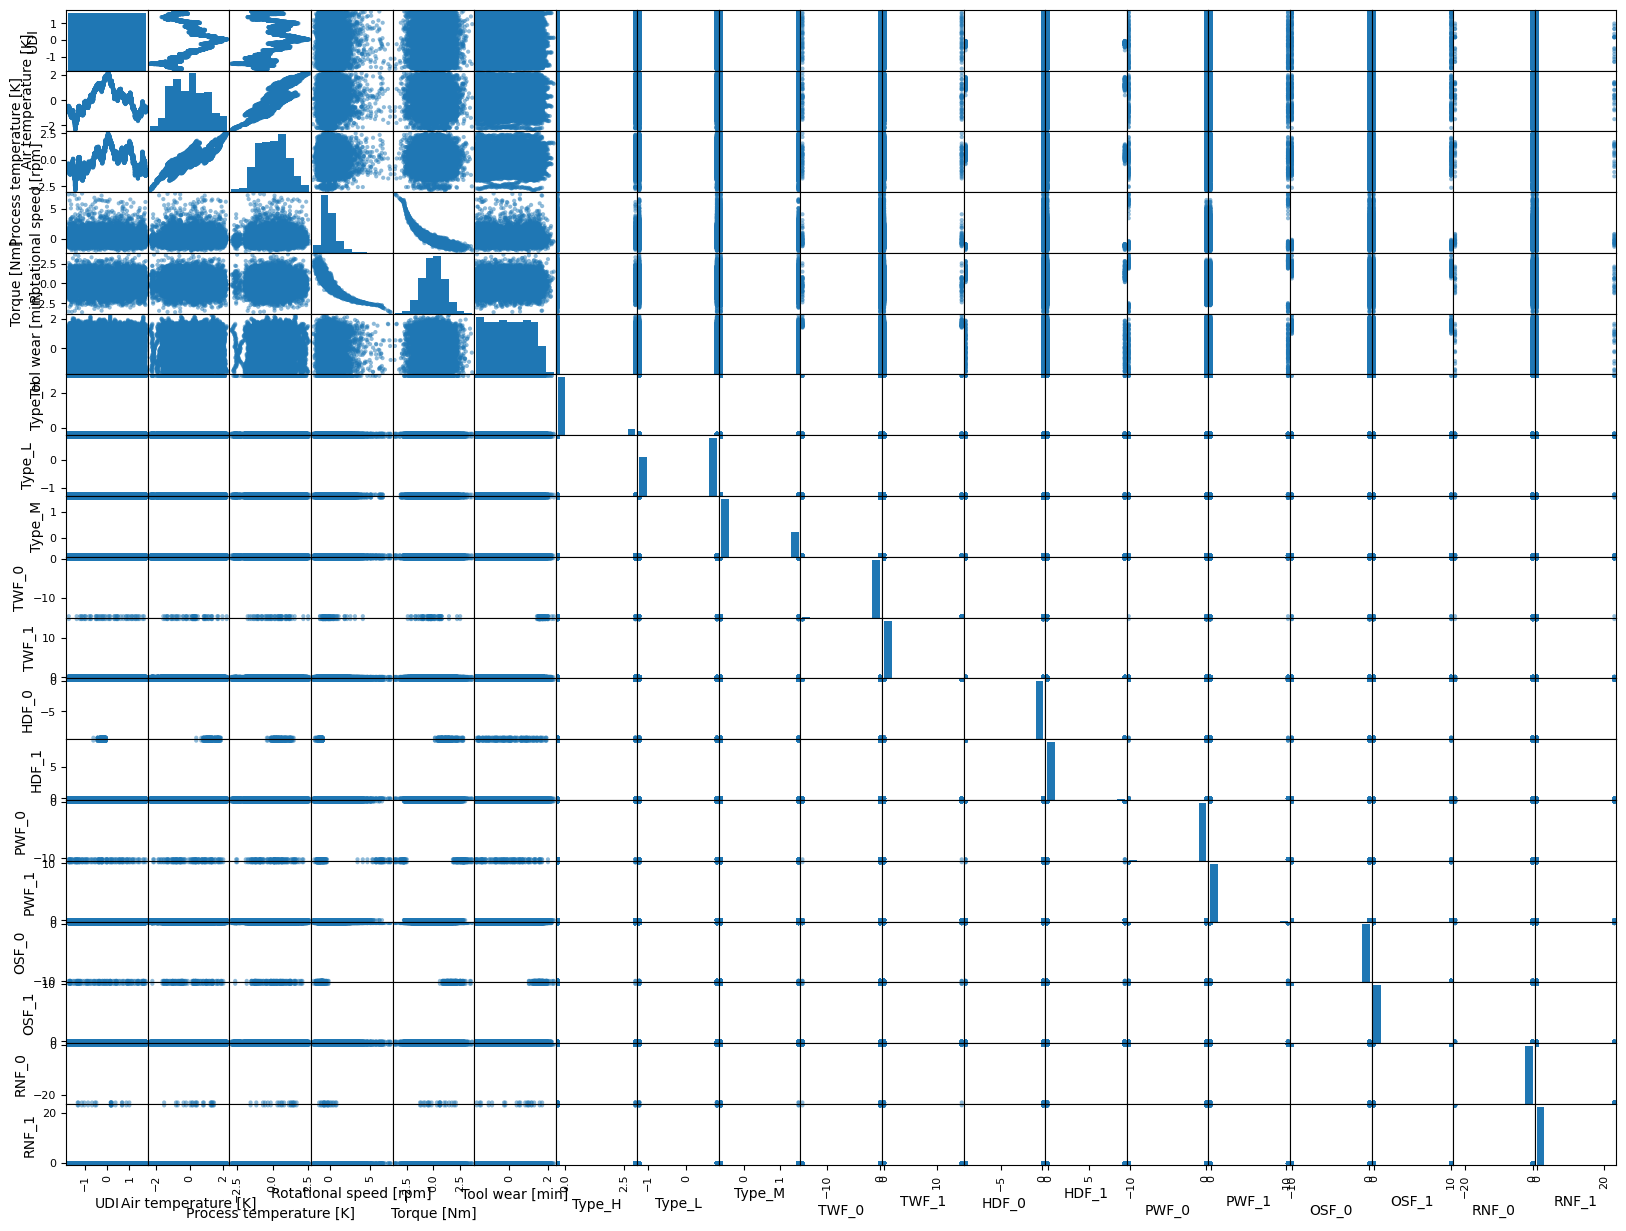

In [351]:
pd.plotting.scatter_matrix(inputData,figsize=(20,15))
plt.show()

<AxesSubplot: >

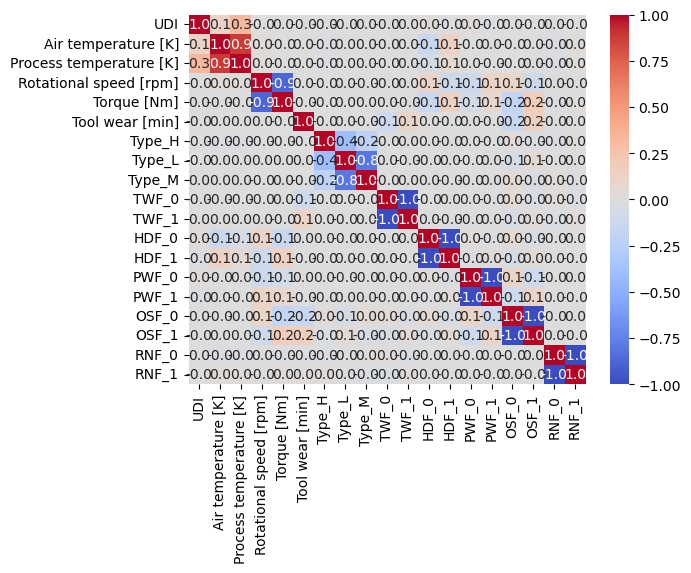

In [352]:
correlationMatrix = inputData.corr()
sns.heatmap(correlationMatrix,annot=True,fmt='.1f',cmap='coolwarm')

In [353]:
#train_set, test_set = split_train_test(inputFeatures, 0.25)
X_train, X_test, y_train, y_test = train_test_split(inputData,target, test_size=0.2,stratify=target)

In [354]:
print("X_train size = ", X_train.shape)
print("X_test size = ", X_test.shape)
print("X_train size = ", y_train.shape)
print("X_train size = ", y_test.shape)

X_train size =  (8000, 19)
X_test size =  (2000, 19)
X_train size =  (8000,)
X_train size =  (2000,)


In [355]:
y_test.value_counts()


0    1932
1      68
Name: Machine failure, dtype: int64

In [356]:
y_train.value_counts()

0    7729
1     271
Name: Machine failure, dtype: int64

In [357]:
#Train the Logistic Regression Model
#yPred = [None]*len(X_test)
logisticRegression = LogisticRegression(max_iter=1000)
logisticRegression.fit(X_train,y_train)
yPred = logisticRegression.predict(X_test)


In [358]:
# Calculate accuracy,precision, recall and f1 score
lrAccuracy = accuracy_score(y_test,yPred)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test,yPred, average = 'weighted')
print("Accuracy: ", lrAccuracy)
print("Precision: ", precision)
print("Recall: ",recall)
print("F1-score:", f1_score)

Accuracy:  0.999
Precision:  0.9990010341261634
Recall:  0.999
F1-score: 0.9989927959787199


In [ ]:
#plotting confusion matrix


In [ ]:
#performing cross validation